# Polynomial Linear Regression for Employee Salaries

Normally, we cannot use a linear regression to calculate employee salaries, because employee skill is not linear. Instead, we can make use of a polynomial linear regression formula to estimate an employee salary given their skill level. In this project, the level is the independent variable and the employee salary is the dependent variable. The polynomial regression formula can be calculated using this general formula.

Polynomial Regression General Formula:

y = a+b1x+b2x^2+b3x^3+b4x^4+....+bNx^N

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## We now can import the dataset using pandas into a df dataframe
df = pd.read_csv("salaries.csv")
df

,level,salary
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


This is our dataset! We can separate it into different columns based on independent and dependent variables.

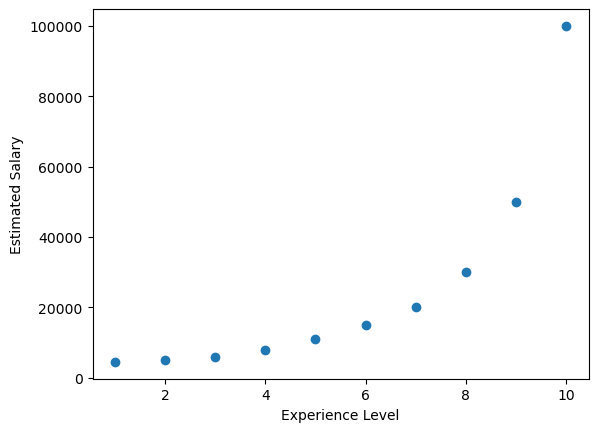

In [3]:
plt.scatter(df["level"], df["salary"])
plt.xlabel("Experience Level")
plt.ylabel("Estimated Salary")
plt.savefig("1.png", dpi=300) ##This saves the figure if you want! 
plt.show()

We wouldn't do a linear regression for this graph, but here is an example of a linear regression demonstrated on this plot of data points.

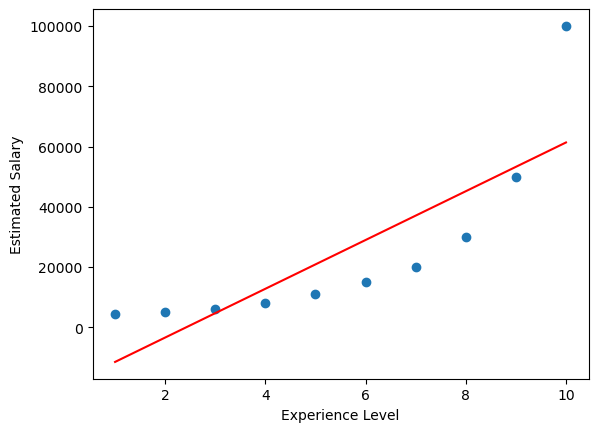

In [5]:
reg = LinearRegression()
reg.fit(df[["level"]], df["salary"])

plt.xlabel("Experience Level")
plt.ylabel("Estimated Salary")

plt.scatter(df["level"], df["salary"])

xaxis = df["level"]
yaxis = reg.predict(df[["level"]])
plt.plot(xaxis, yaxis, color='Red', label="Linear Regression")
plt.show()

Oh no! Only one point has touched the line. This makes our linear estimation inaccurate. Instead, we could use the polynomial regression to have a better chance of hitting several of the data points. After practice of using several regressional models, you will be able to choose a regressional model based upon the scatter of data points. 

#### Polynomial Regression: We decided it could be used as one of the regressional types, to apply for this specific data set. This is how we implement it into our model:

We have to fix our X value in order to be able to fit a polynomial regression. How can we do this?

Therefore => 1, x, x^2 (N=2)

In [15]:
## We can utilize the PolynomialFeatures function to adapt previous function into a polynomial function
## Now, we specify the degree (N) of the polynomial when calling the function 
polynomial_regression = PolynomialFeatures(degree=4)

x_polynomial = polynomial_regression.fit_transform(df[["level"]])

In [16]:
## Next, we fit the x_polynomial and y axes by creating the object "reg" as we have before and call it into "fit".
## We will train the regressional model with our given data.
reg=LinearRegression()
reg.fit(x_polynomial, df["salary"])

LinearRegression()

#### Let's create our data now after altering our reg object.

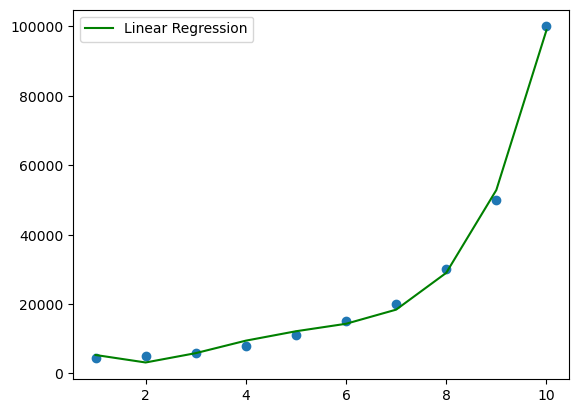

In [17]:
y_hd=reg.predict(x_polynomial)
plt.plot(df["level"], y_hd, color='green', label="Linear Regression")
plt.legend()

#Let us scatter the points to see if our regressional model fits. 
plt.scatter(df["level"], df["salary"])

plt.show()

We can see that this graph fits better than the regressional model with N=1 that we initialized in the beginning. In this model, N=2 (the power of the polynomial). We can attempt to estimate this graph better by creating N=3 or N=4. 

#### Calculating an employee with 4.5 experience level

In [20]:
x_polynomial1 = polynomial_regression.fit_transform([[4.5]])
reg.predict(x_polynomial1)

array([10958.21496212])

In [22]:
##You can also round the value given to you by using the same previous line of code and using .round() at the end.
reg.predict(x_polynomial1).round()

array([10958.])

Special thanks to Yazılım Teknolojileri Akademisi on Udemy for providing this example to teach his students Jupyter Notebook. Check out his course here: https://tinyurl.com/y3u9rdem